In [3]:
import sqlite3

# Recreate the database and sales table
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Drop the table if it already exists (to avoid duplicates/errors)
cursor.execute("DROP TABLE IF EXISTS sales")

# Create a new table
cursor.execute('''
CREATE TABLE sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

# Insert sample data
sample_data = [
    ("Pen", 10, 5.0),
    ("Notebook", 5, 20.0),
    ("Pencil", 12, 2.0),
    ("Eraser", 8, 3.0),
    ("Pen", 15, 5.0),
    ("Notebook", 3, 20.0)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)

# Commit and close
conn.commit()
conn.close()

print("✅ sales_data.db recreated successfully with 'sales' table.")


✅ sales_data.db recreated successfully with 'sales' table.


In [4]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("sales_data.db")

query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
conn.close()

print(df)


    product  total_qty  revenue
0    Eraser          8     24.0
1  Notebook          8    160.0
2       Pen         25    125.0
3    Pencil         12     24.0


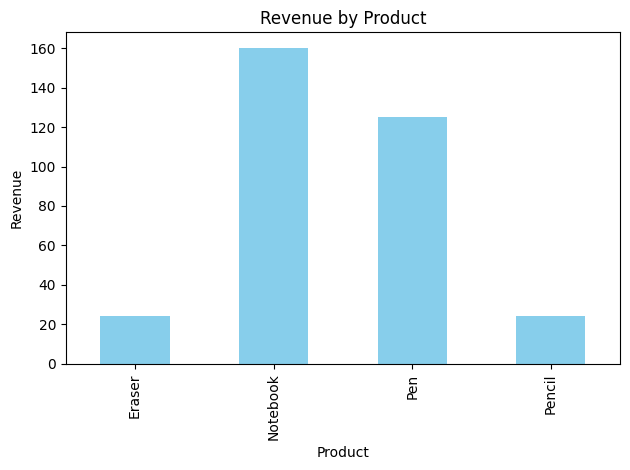

In [5]:
import matplotlib.pyplot as plt

# Plot a bar chart of revenue by product
df.plot(
    kind='bar',
    x='product',
    y='revenue',
    color='skyblue',
    legend=False,
    title='Revenue by Product'
)

# Add axis labels
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()

# Optional: Save the chart as an image
plt.savefig("sales_chart.png")

# Show the chart
plt.show()
